In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True)

The learning curves are loaded and plotted.

In [2]:
df = pd.read_csv('./baseModel.csv', header=None)

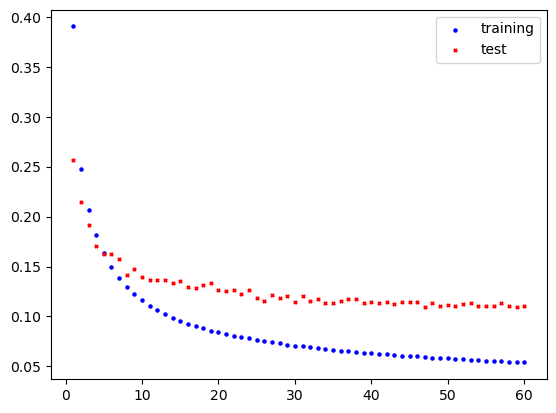

In [3]:
plt.figure()
plt.scatter(np.arange(1, df.shape[0]+1), df[0].values, marker='o', color='blue', s = 5, label ='training')
plt.scatter(np.arange(1, df.shape[0]+1), df[1].values, marker='x', color='red', s = 5, label ='test')
plt.legend(loc='best')
plt.show()

Now, the observed lattice parameters (*ytest.npy*) and the predicted ones (*baseModel_predtest.npy*) by the base model are loaded to be compared

In [4]:
y = np.load('./ytest.npy')
p = np.load('./baseModel_predtest.npy')

It is important to mention that the lattice parameter are sorted according to the length of the unit-vectors. The angles are sorted accordingly.

In [5]:
rmse = ((y[:,:3]-p[:,:3])**2).mean()**0.5
print('RMSE:', rmse, 'angstroms')

RMSE: 0.978745752820119 angstroms


Now we calculate the RMSE for each unit-vector.

In [6]:
((y[:,:3]-p[:,:3])**2).mean(axis=0)**0.5

array([1.28254193, 0.87166008, 0.68492674])

The mean percentage absolute error of the angles are calculated in the next cell.

In [7]:
100*(abs(y[:,:3]-p[:,:3])/y[:,:3]).mean(axis=0)

array([3.12650599, 3.37695417, 4.16484386])

Now a comparison of the assessed unit-vectors and the actual ones is plotted.

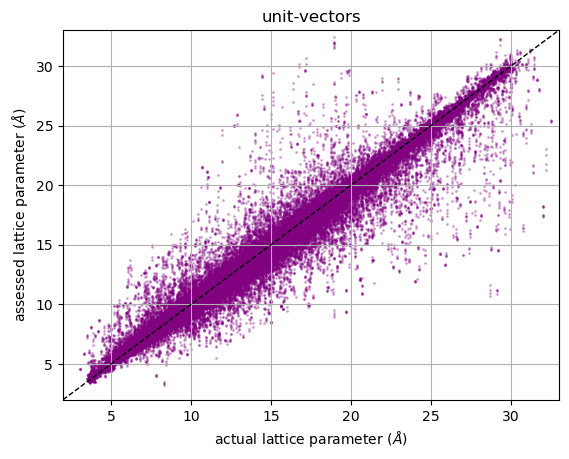

In [8]:
plt.figure()
plt.title(r'unit-vectors')
plt.scatter(y[:,:3], p[:,:3], color='purple', s = 1, marker='D', alpha=0.25)
plt.grid()
plt.xlabel(r'actual lattice parameter ($\AA$)')
plt.ylabel(r'assessed lattice parameter ($\AA$)')

latmean = y[:,:3].mean() 
latstd = y[:,:3].std() 
limmin = int(latmean-2.1*latstd)
limmax = round(latmean + 4*latstd)
plt.xlim(limmin, limmax)
plt.ylim(limmin, limmax)
plt.plot(np.arange(limmin, limmax+1), np.arange(limmin, limmax+1), linewidth=1, linestyle ='--', color='black')
plt.show()

The distribution of the absolute errors is shown in the next cell.

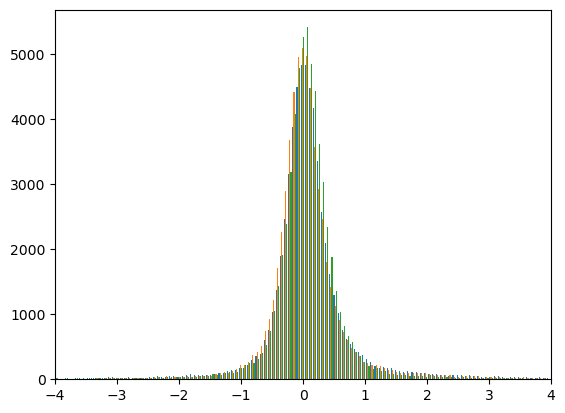

In [9]:
plt.figure()
plt.hist((y[:,:3]-p[:,:3]), bins=500)
plt.xlim(-4,4)
plt.show()

Now, we proceed to calculate the volume of the unit-cell using the predicted unit-vectors. For this calculation, we consider that the angles are orthogonal. This is done because the predictions of the angles are not as accurate as for the unit-vectors.

In [10]:
dftest = pd.read_csv('./dftest.csv')
db_info = pd.read_csv('./om_info.csv')

In [11]:
cifs = [int(i.split('_')[0]) for i in dftest.name]

In [12]:
adict = {k:v for k,v in zip(db_info.cif, db_info.a)}
bdict = {k:v for k,v in zip(db_info.cif, db_info.b)}
cdict = {k:v for k,v in zip(db_info.cif, db_info.c)}

alphadict = {k:v for k,v in zip(db_info.cif, db_info.alpha)}
betadict = {k:v for k,v in zip(db_info.cif, db_info.beta)}
gammadict = {k:v for k,v in zip(db_info.cif, db_info.gamma)}

In [13]:
def volume(cif = 1):
    
    a = adict[cif]
    b = bdict[cif]
    c = cdict[cif]
    
    alpha = alphadict[cif]
    beta = betadict[cif]
    gamma = gammadict[cif]
    
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    gamma = np.deg2rad(gamma)
    
    return a*b*c*np.sqrt(1 + 2*np.cos(alpha)*np.cos(beta)*np.cos(gamma) - (np.cos(alpha))**2 - (np.cos(beta))**2 - (np.cos(gamma))**2)

In [14]:
dftest['Vreal'] = [volume(i) for i in cifs]

In [15]:
dftest['Vass'] = p[:,0]*p[:,1]*p[:,2]

In the next cell, the MAPE of the volumes is computed.

In [16]:
100*abs((dftest.Vreal-dftest.Vass)/dftest.Vreal).mean()

6.115258920715011

And the RMSE of the assessed volumes is obtained in the next cell.

In [17]:
((dftest.Vreal-dftest.Vass)**2).mean()**0.5

201.2008785247032

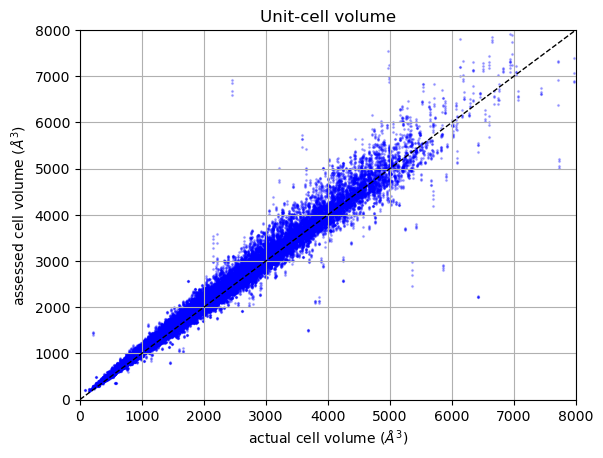

In [18]:
plt.figure()
plt.title('Unit-cell volume')
plt.scatter(dftest.Vreal, dftest.Vass, color='blue', s = 1, marker='D', alpha=0.25)
plt.grid()
plt.xlabel(r'actual cell volume ($\AA^{3}$)')
plt.ylabel(r'assessed cell volume ($\AA^{3}$)')
plt.plot(np.arange(0,8000),np.arange(0,8000), color='black', linewidth=1, linestyle='--')
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.show()

Now, we will obtain the metrics RMSE and MAPE for the angles. This calculation was not implemented in the past cells. 

In [19]:
angpred = p[:,3:]
angreal = y[:,3:]

angpred[angpred < -1] = -1

angpred = np.arccos(angpred)
angreal = np.arccos(angreal)

angpred = np.rad2deg(angpred)
angreal = np.rad2deg(angreal)

print('rmse:')
print(((angreal - angpred)**2).mean()**0.5)
print(((angreal - angpred)**2).mean(axis=0)**0.5)
print('mape:')
print(((100*abs(angreal - angpred))/angreal).mean())
print(((100*abs(angreal - angpred))/angreal).mean(axis=0))

rmse:
8.68233661649771
[9.28608678 7.51443065 9.13514268]
mape:
6.192397893376928
[6.46729027 5.41901724 6.69088617]


We plot the assessed angles by the base model vs. the observed ones.

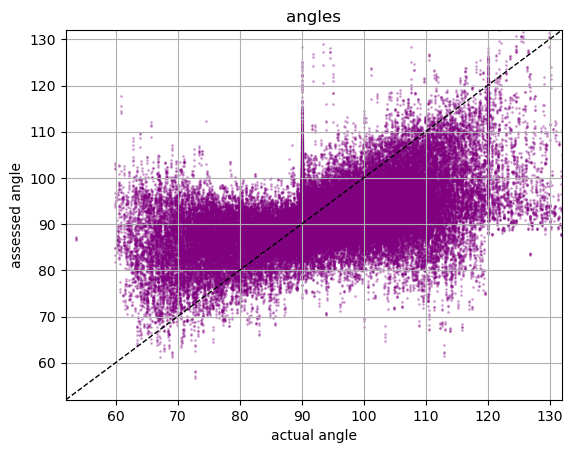

In [20]:
#for item in range(3):
plt.figure()
plt.title(r'angles')
plt.scatter(angreal, angpred, color='purple', s = 1, marker='D', alpha=0.25)
plt.grid()
plt.xlabel(r'actual angle')
plt.ylabel(r'assessed angle')

latmean = angreal.mean() 
latstd = angreal.std() 
limmin = int(latmean-4*latstd)
limmax = round(latmean + 4*latstd)
plt.xlim(limmin, limmax)
plt.ylim(limmin, limmax)
plt.plot(np.arange(limmin, limmax+1), np.arange(limmin, limmax+1), linewidth=1, linestyle ='--', color='black')
plt.show()

### Analysis by crystal system

In [21]:
y[:,3:] = angreal
p[:,3:] = angpred

In [22]:
dfsgnum = pd.read_csv('./sgnum_cif.csv')
sgnum_diccio = {k:v for k,v in zip(dfsgnum.cif, dfsgnum.sgnum)}
db_info['sgnum'] = [sgnum_diccio[db_info['cif'][item]] for item in range(db_info.shape[0])]

In [23]:
sgcol = {k:v for k,v in zip(db_info.cif, db_info.sgnum)}

In [24]:
dftest['sgnum'] = [sgcol[int(i.split('_')[0])] for i in dftest.name]

In [25]:
cs = dict()

for n in range(1,231):
    
    if n <= 2: cs[n]  = 0;
    elif 2 < n <=15: cs[n] = 1;
    elif 15 < n <=74: cs[n] = 2;
    elif 74 < n <=142: cs[n] = 3;
    elif 142 < n <=167: cs[n] = 4;
    elif 167 < n <=194: cs[n] = 5;
    elif 194 < n <=230: cs[n] = 6;
        
dftest['cs'] = [cs.get(i, None) for i in dftest.sgnum.values]

triclinic
RMSE/MAPE
Mean unit vectors: 0.5699382387243588 2.549339393345078
Mean angles: 12.576251347102735 11.41085264898245
By lattice parameter: [ 0.70790073  0.46614855  0.50603446 13.95887402 10.66098283 12.88330606] 
 [ 2.00103206  2.43405415  3.21293198 12.5073824   9.64744403 12.07773152]




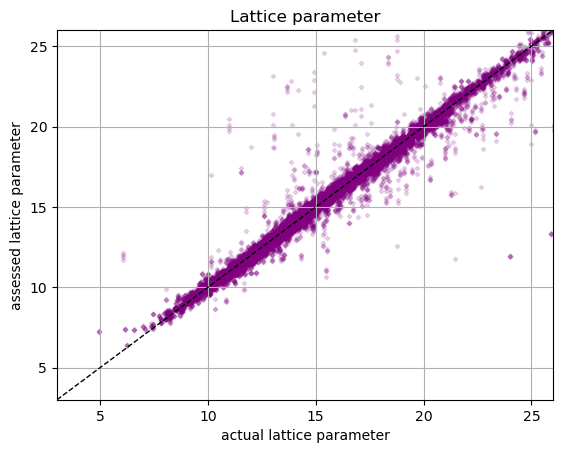

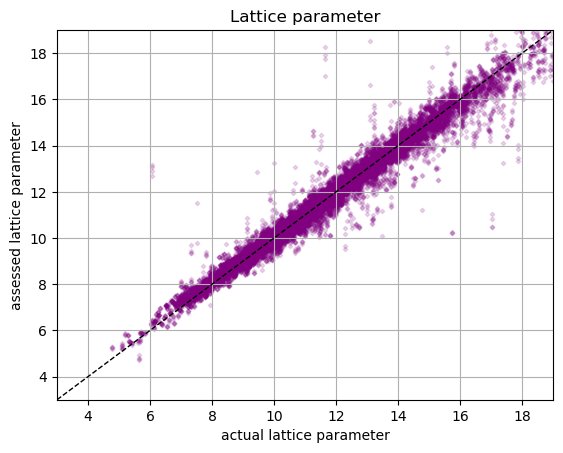

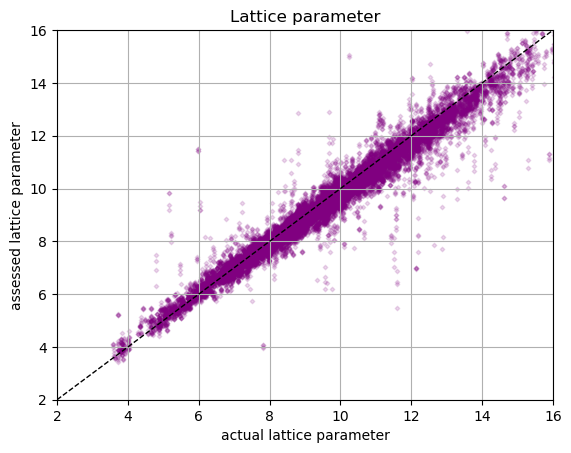

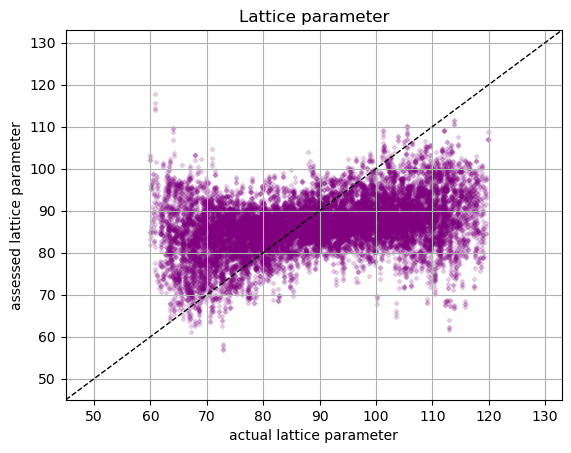

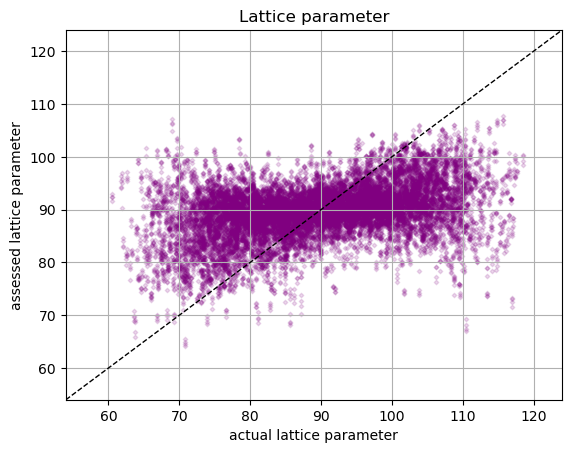

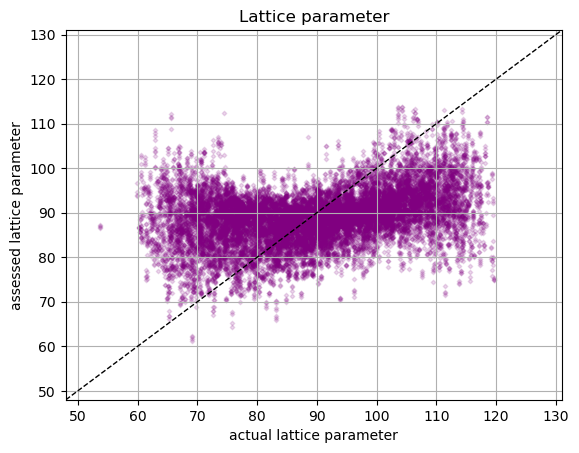

monoclinic
RMSE/MAPE
Mean unit vectors: 1.1276882065416471 4.1782043934504465
Mean angles: 6.608270286693074 4.118787387966927
By lattice parameter: [1.50955164 0.99515652 0.73889066 6.48566465 6.01965847 7.25999825] 
 [3.95066167 3.99313931 4.5908122  4.02742473 3.77982549 4.54911194]




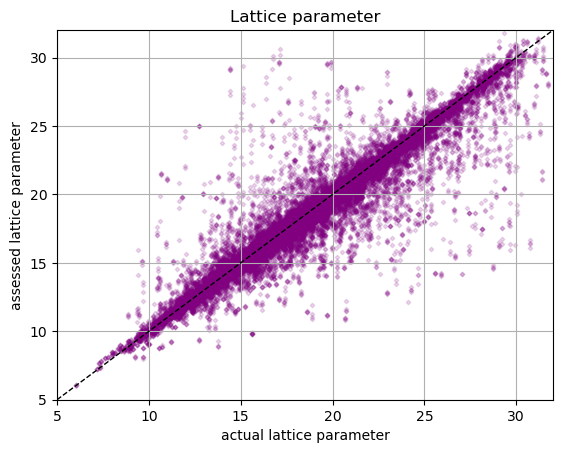

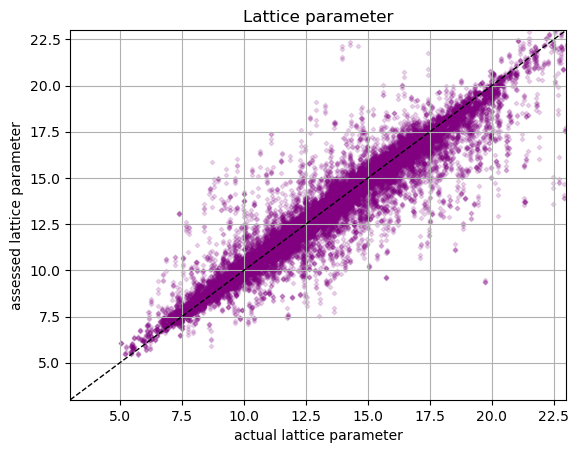

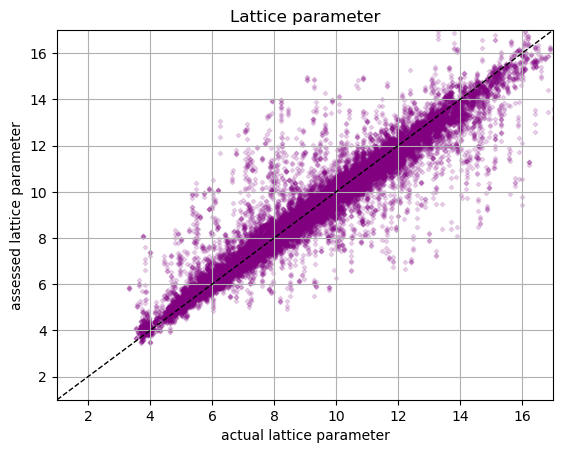

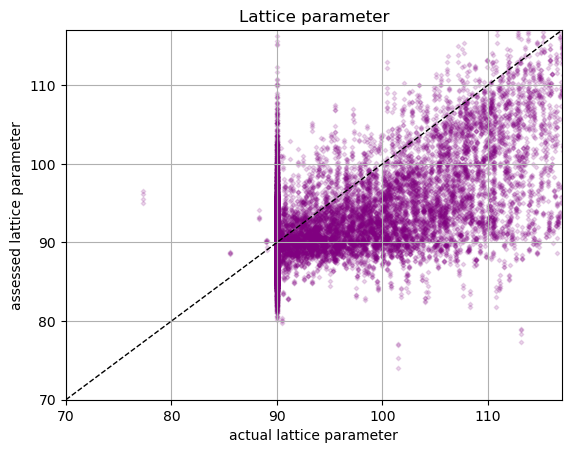

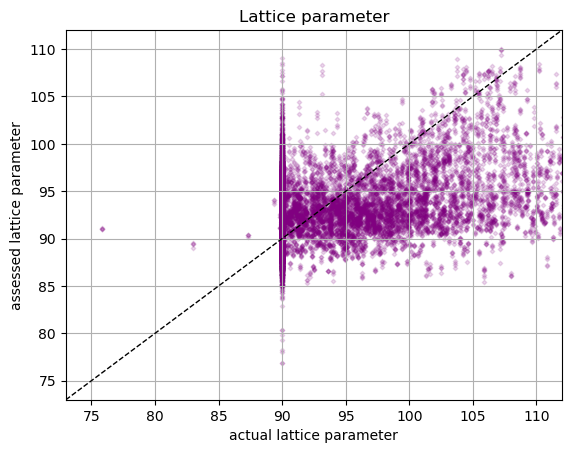

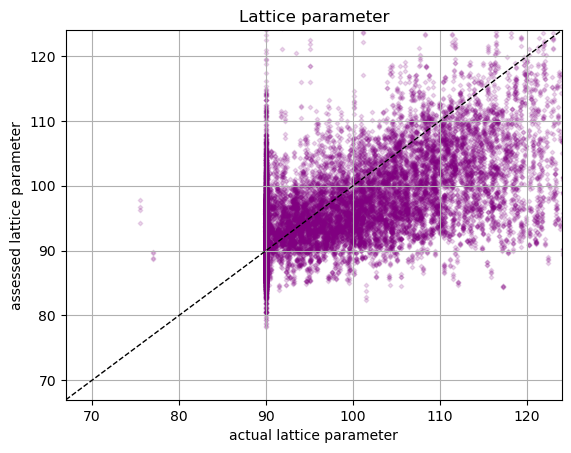

orthorhombic
RMSE/MAPE
Mean unit vectors: 0.9308907574153534 3.2313654837103174
Mean angles: 2.755756524012845 2.225785247114112
By lattice parameter: [1.2081136  0.81764589 0.68672376 2.48680641 2.57518779 3.15702135] 
 [2.34046459 2.9607578  4.39287406 1.93144613 2.21684815 2.52906146]




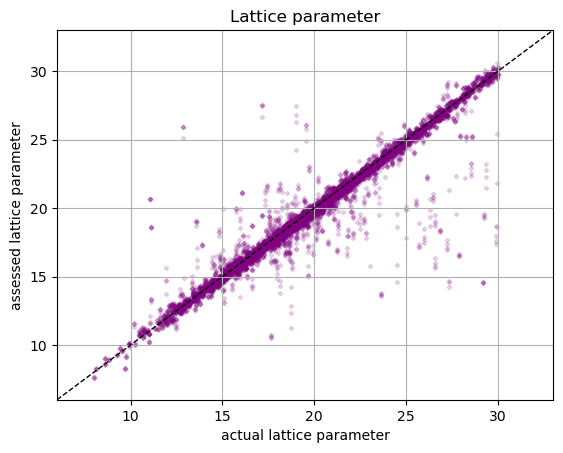

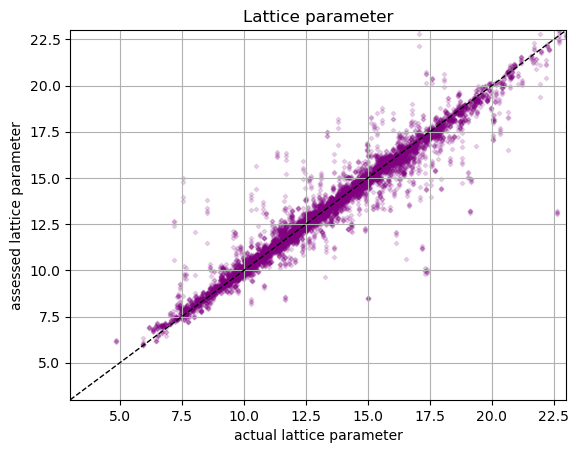

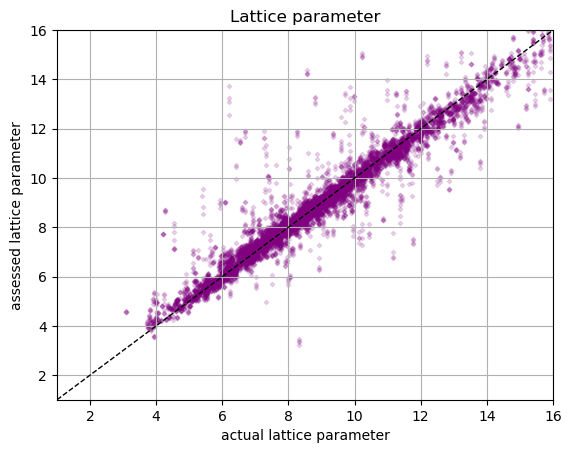

C:\Users\igofo\AppData\Local\Temp\ipykernel_17308\2602392289.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(limmin, limmax)
C:\Users\igofo\AppData\Local\Temp\ipykernel_17308\2602392289.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(limmin, limmax)


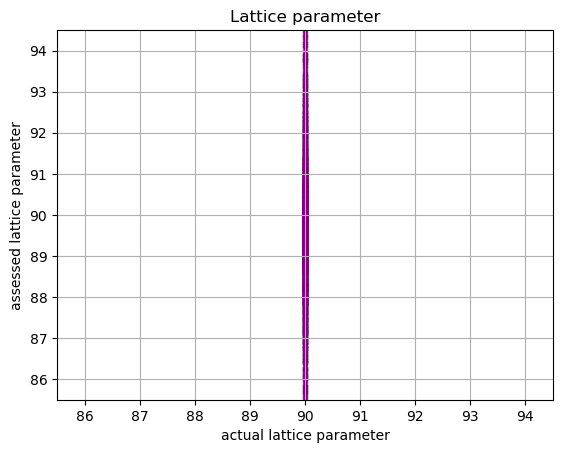

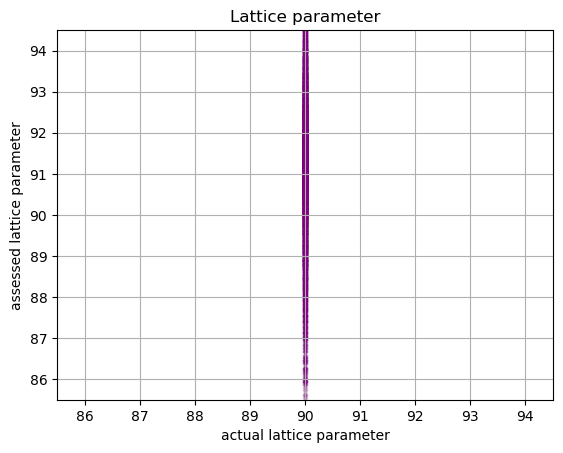

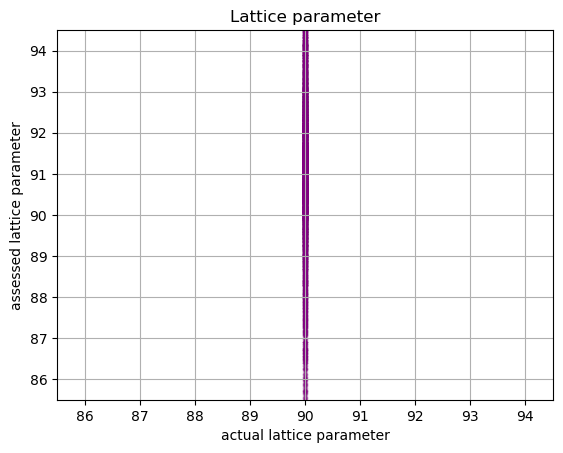

tetragonal
RMSE/MAPE
Mean unit vectors: 1.7264728790016741 5.855636756063727
Mean angles: 3.24706110141769 2.6886922056445086
By lattice parameter: [2.09358717 1.6949686  1.29849913 3.46326942 2.86930866 3.37684027] 
 [5.57280214 4.94394832 7.05015981 2.91901969 2.32802435 2.81903258]




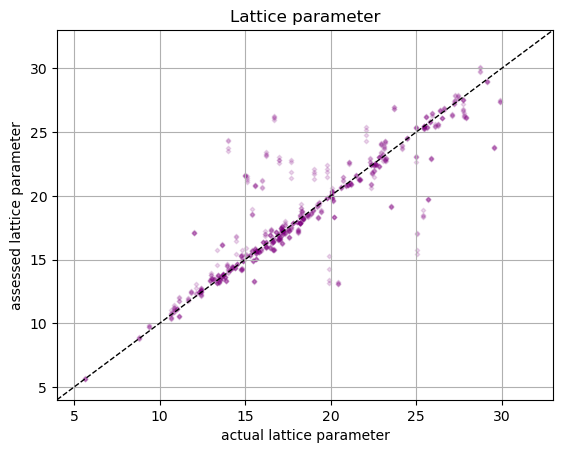

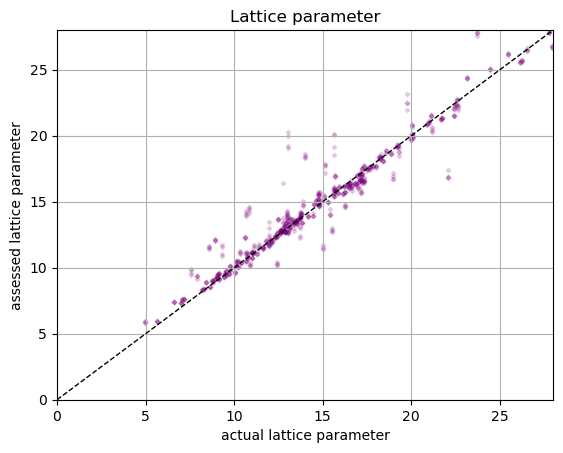

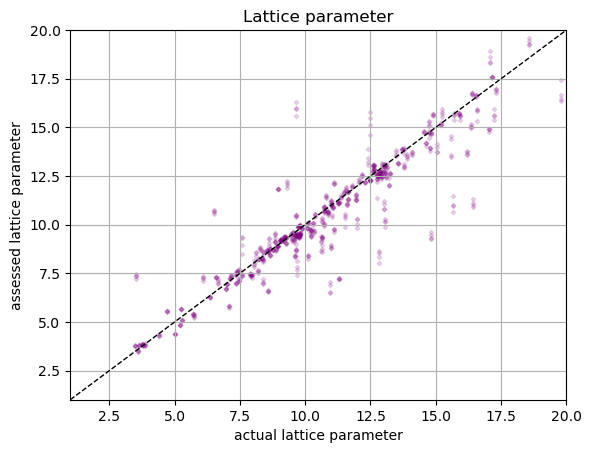

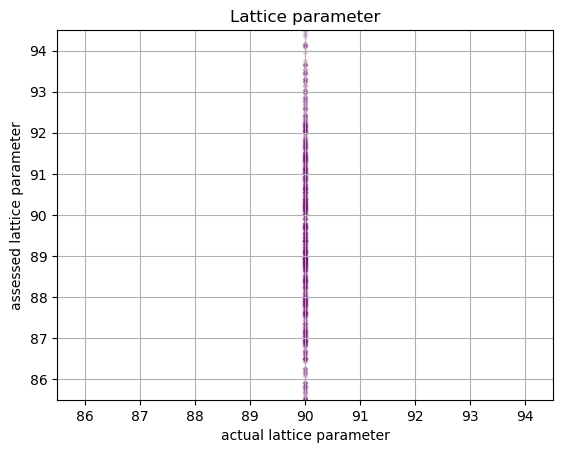

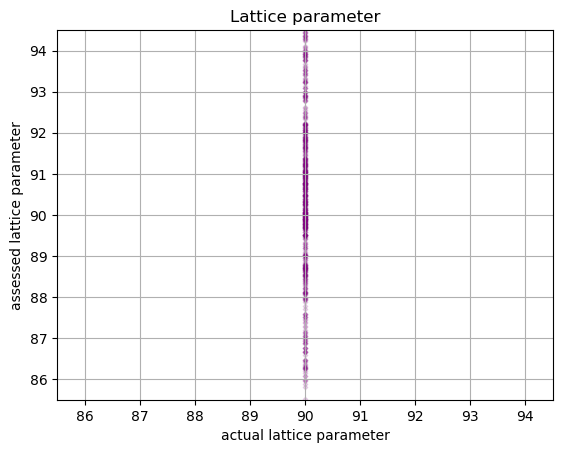

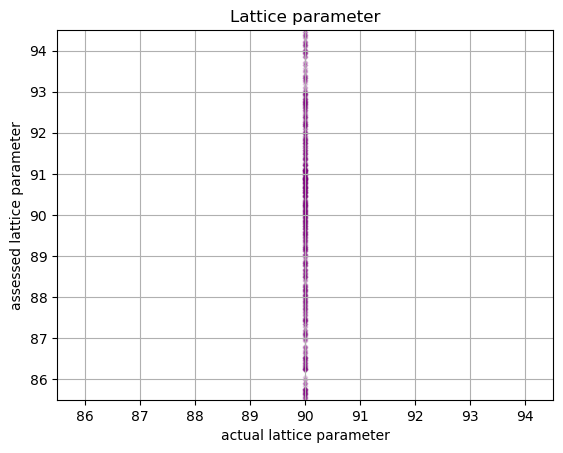

trigonal
RMSE/MAPE
Mean unit vectors: 2.273337509452981 5.987739914118455
Mean angles: 10.071576380219579 6.0180761081379135
By lattice parameter: [ 2.53688541  2.64906314  1.43208491 10.21264767  4.92312756 13.25800117] 
 [4.75380324 6.86380563 6.34561087 6.73308228 2.93950715 8.38163889]




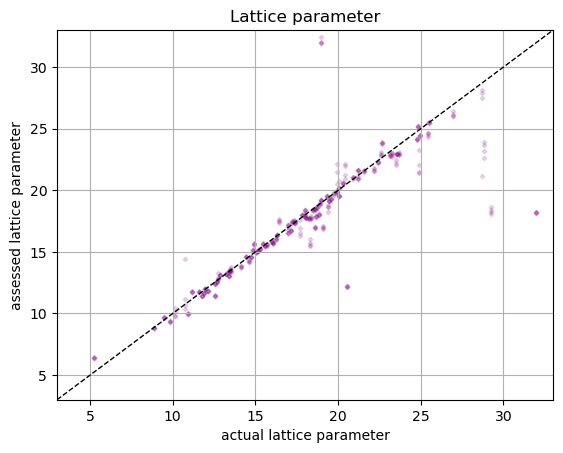

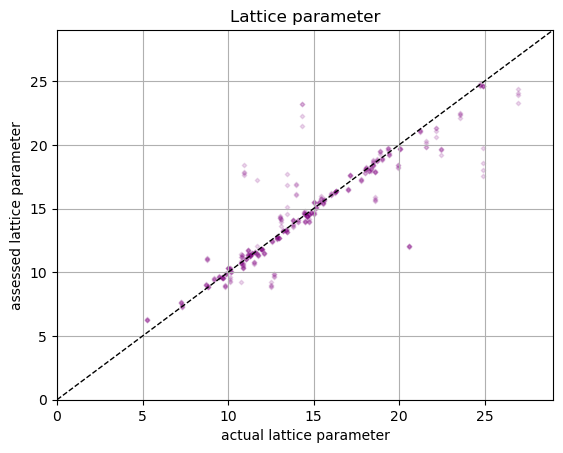

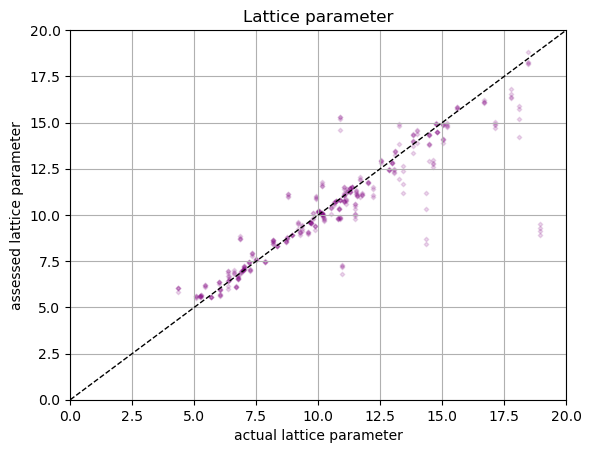

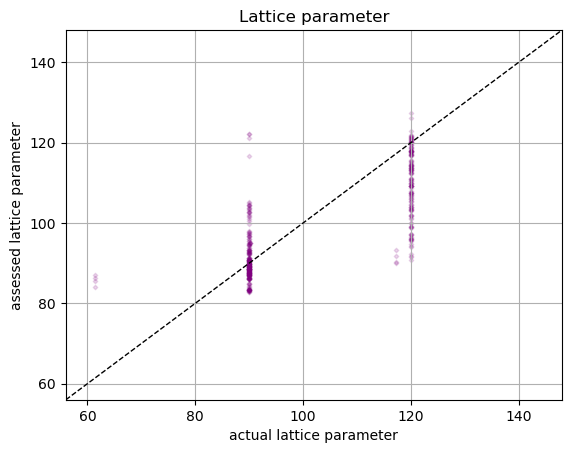

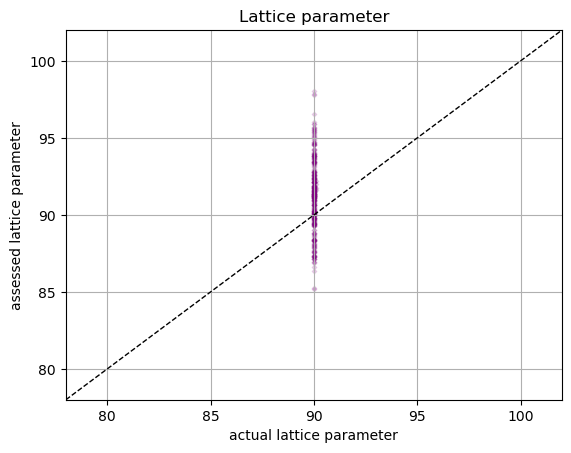

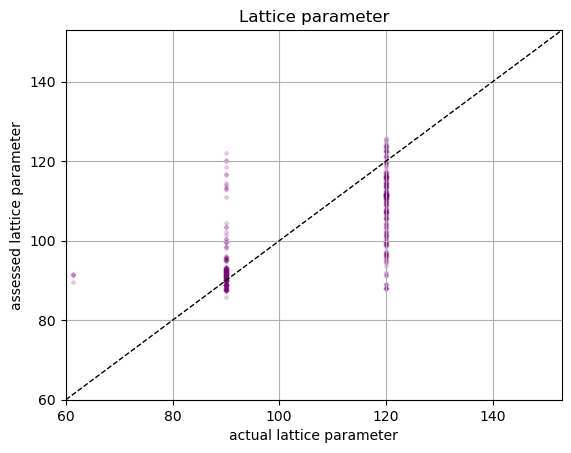

hexagonal
RMSE/MAPE
Mean unit vectors: 1.0613656971115486 3.9934830287828698
Mean angles: 7.821215596046348 4.791794268076945
By lattice parameter: [1.09371468 0.83450542 1.21937703 9.41589469 2.62562489 9.37876651] 
 [3.74961596 3.02931403 5.2015191  6.12183539 2.25742349 5.99612393]




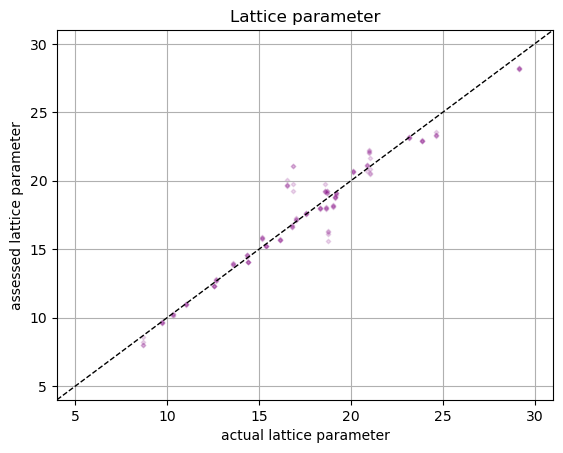

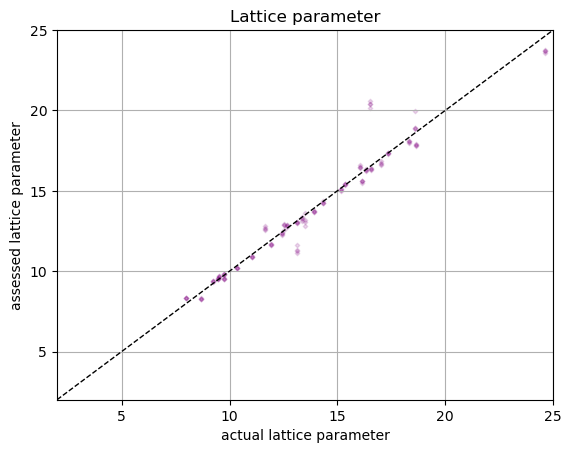

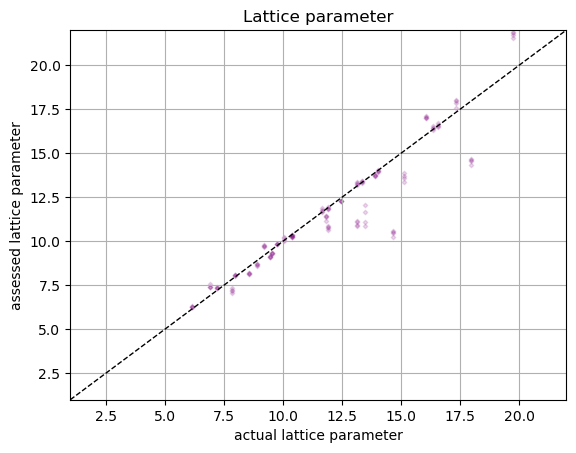

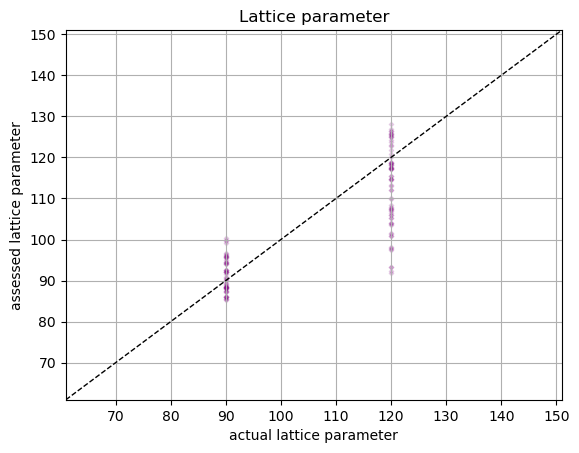

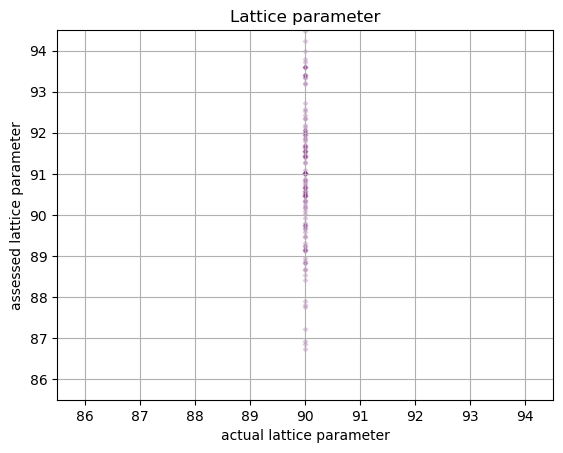

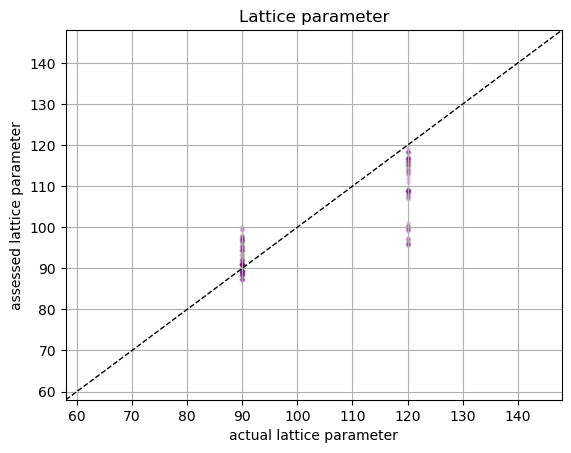

cubic
RMSE/MAPE
Mean unit vectors: 0.6320667658383308 2.5824805920299987
Mean angles: 4.70662311833766 4.221234161593212
By lattice parameter: [0.57232891 0.56674773 0.74145925 5.53102587 4.16087356 4.30717861] 
 [2.0581015  1.93534458 3.7539957  4.83128482 3.62845475 4.20396291]




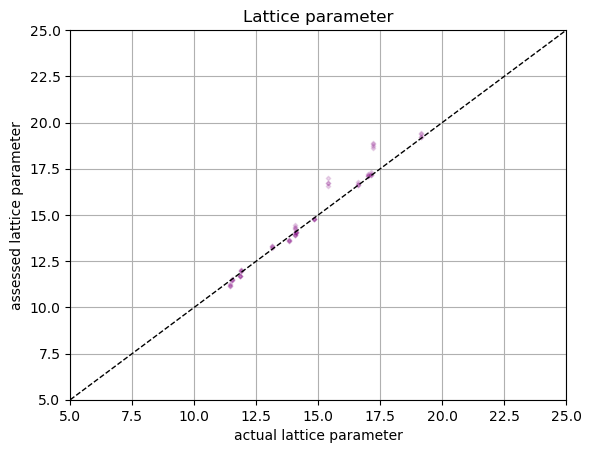

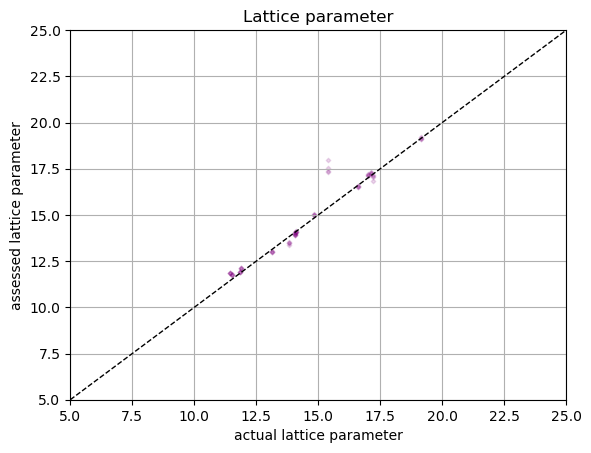

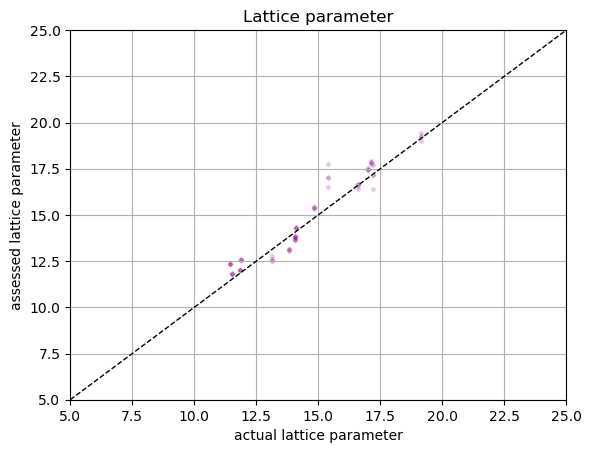

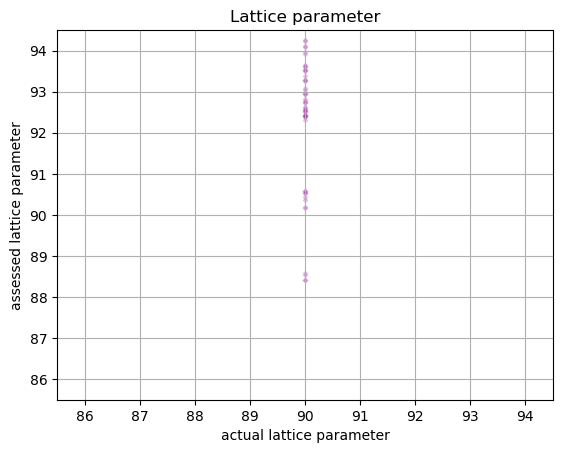

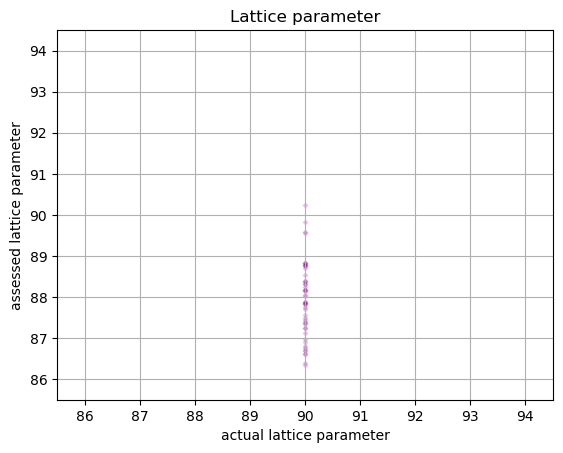

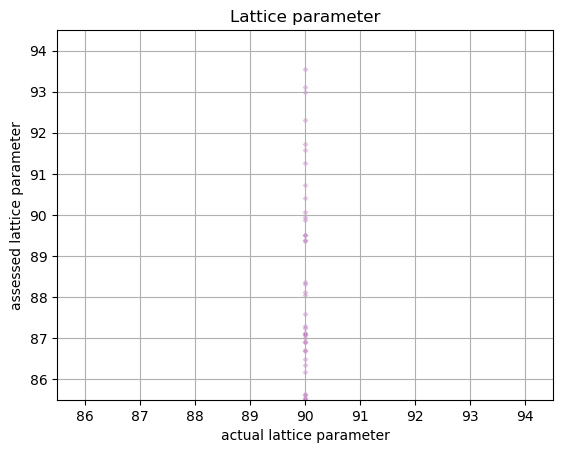

In [26]:
for cs, system in enumerate(['triclinic', 'monoclinic','orthorhombic','tetragonal','trigonal','hexagonal','cubic']):
    
    print(system)
    idx = dftest[dftest['cs'] == cs].index

    print('RMSE/MAPE')
    print('Mean unit vectors:', ((y[idx,:3]-p[idx,:3])**2).mean()**0.5, 100*(abs(y[idx,:3]-p[idx,:3])/y[idx,:3]).mean())
    print('Mean angles:', ((y[idx,3:]-p[idx,3:])**2).mean()**0.5, 100*(abs(y[idx,3:]-p[idx,3:])/y[idx,3:]).mean())
    print('By lattice parameter:', ((y[idx,:]-p[idx,:])**2).mean(axis=0)**0.5,'\n', 100*(abs(y[idx,:]-p[idx,:])/y[idx,:]).mean(axis=0))
    print('\n')

    for lp in range(6):
        
        plt.figure()
        plt.title(r'Lattice parameter')
        plt.scatter(y[idx,lp], p[idx,lp], color='purple', s = 5, marker='D', alpha=0.15)
        plt.grid()
        plt.xlabel(r'actual lattice parameter')
        plt.ylabel(r'assessed lattice parameter')

        latmean = y[idx, lp].mean() 
        latstd = y[idx, lp].std() 
        limmin = int(latmean-3*latstd)
        limmax = round(latmean + 3*latstd)
        plt.xlim(limmin, limmax)
        plt.ylim(limmin, limmax)
        plt.plot(np.arange(limmin, limmax+1), np.arange(limmin, limmax+1), linewidth=1, linestyle ='--', color='black')
        plt.show()


### End of Notebook